<a href="https://colab.research.google.com/github/Maithraanand/Maithraanand-Binary-Image-Classification/blob/main/Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/Maithraanand/Maithraanand-Binary-Classification-Pizza-or-Not-Pizza"

Cloning into 'Maithraanand-Binary-Classification-Pizza-or-Not-Pizza'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (226/226), done.
remote: Total 232 (delta 3), reused 211 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (232/232), 9.15 MiB | 21.45 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory('/content/Maithraanand-Binary-Classification-Pizza-or-Not-Pizza/Dataset/Train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/content/Maithraanand-Binary-Classification-Pizza-or-Not-Pizza/Dataset/Test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

# Building the CNN
cnn = tf.keras.models.Sequential()

# Adding the first convolutional layer with batch normalization
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding the second convolutional layer with batch normalization
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full connection with batch normalization
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())

# Output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the CNN on the training set and evaluating it on the test set
cnn.fit(x=training_set, validation_data=test_set, epochs=20)

# Summarizing the model
cnn.summary()

# Making a single prediction
import numpy as np
from keras.preprocessing import image

test_image = tf.keras.utils.load_img('/content/Maithraanand-Binary-Classification-Pizza-or-Not-Pizza/Dataset/Validation/Pizza.jpg',
                                     target_size=(64, 64))
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
    prediction = 'Pizza'
else:
    prediction = 'Not Pizza'

print(prediction)


Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 599ms/step - accuracy: 0.5533 - loss: 1.1440 - val_accuracy: 0.5450 - val_loss: 0.6606
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 344ms/step - accuracy: 0.7711 - loss: 0.5145 - val_accuracy: 0.5800 - val_loss: 0.6360
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 409ms/step - accuracy: 0.8090 - loss: 0.3816 - val_accuracy: 0.5150 - val_loss: 0.6534
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 323ms/step - accuracy: 0.9058 - loss: 0.2537 - val_accuracy: 0.5100 - val_loss: 0.7035
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.9076 - loss: 0.2583 - val_accuracy: 0.5100 - val_loss: 0.7010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.8538 - loss: 0.2763 - val_accuracy: 0.5100 - val_loss: 0.7060
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.9102 - loss: 0.2411 - val_accuracy: 0.5150 - val_loss: 0.6967
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 304ms/step - accuracy: 0.9557 - loss: 0.2070 - val_accuracy: 0.6250 - val_loss: 0.6228
Ep

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,441,189 (9.31 MB)

 Trainable params: 813,601 (3.10 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,627,204 (6.21 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Pizza


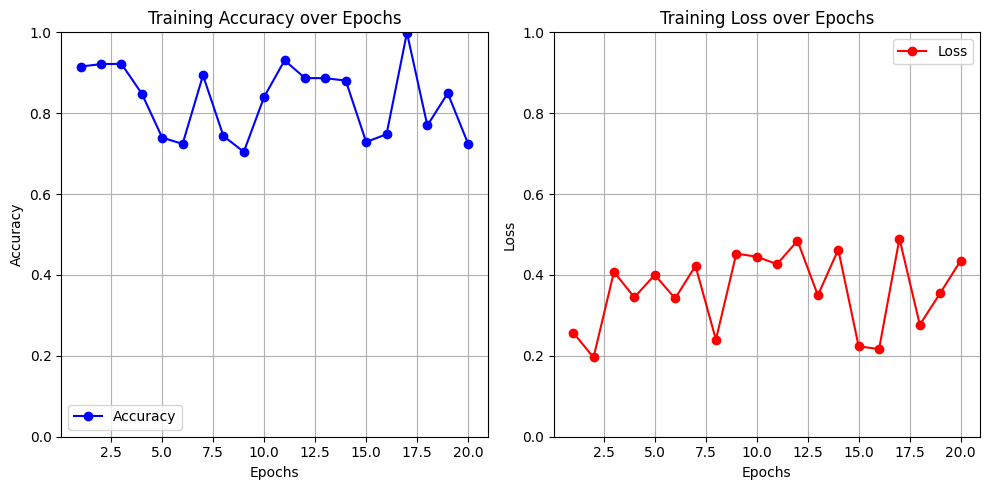

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Mock data for training accuracy and loss over epochs
epochs = np.arange(1, 21)
accuracy = np.random.uniform(0.7, 1.0, size=20)
loss = np.random.uniform(0.1, 0.5, size=20)

# Plotting the training accuracy and loss
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='o', linestyle='-', color='r', label='Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()